In [1]:
pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 9.8 MB/s 


In [2]:
from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np
df = pd.read_json(path_or_buf='/content/drive/MyDrive/DL Project/Data/boolq_train.jsonl', lines=True)


In [3]:
df['question'] = df['question'].astype(str)
df['passage'] = df['passage'].astype(str)

In [4]:
df['input'] = df['passage'] + '[SEP]' +df['question']

In [5]:
df = df[['input','answer']].copy()

In [6]:
df['answer'].value_counts()

True     5874
False    3553
Name: answer, dtype: int64

In [7]:
# Multi Class Classification 
y = pd.get_dummies(df.answer, prefix='answer')
y["answer_dum1"] = 0
y["answer_dum2"] = 0
y["answer_dum3"] = 0
y["answer_dum4"] = 0

In [8]:
y

,answer_False,answer_True,answer_dum1,answer_dum2,answer_dum3,answer_dum4
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9422,0,1,0,0,0,0
9423,0,1,0,0,0,0
9424,0,1,0,0,0,0
9425,1,0,0,0,0,0


In [9]:
import tensorflow as tf
import keras
import tensorflow_hub as hub
import tensorflow_text as text

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", trainable=True)
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)

In [10]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text') # Textual input layer
preprocessed_text = bert_preprocess(text_input) # The preprocessing of text
outputs = bert_encoder(preprocessed_text) # Encoded o/p

# Neural network layers
# l = tf.keras.layers.Dense(50, activation='sigmoid', name="output")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(6, activation='softmax', name="soft_output")(l)

l = tf.keras.layers.Dense(6, activation='softmax', name="soft_output")(outputs['pooled_output'])

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [11]:
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

optimizer = tf.keras.optimizers.Adam(0.00003)
optimizer.learning_rate.assign(0.00003)
model.compile(optimizer=optimizer,
              loss='CategoricalCrossentropy',
              metrics=METRICS)

In [12]:
model.fit(df['input'], y, epochs=4, batch_size=16)

Epoch 1/4
590/590 [==============================] - 171s 266ms/step - loss: 0.6567 - accuracy: 0.8792 - precision: 0.6402 - recall: 0.6288
Epoch 2/4
590/590 [==============================] - 157s 266ms/step - loss: 0.5582 - accuracy: 0.9048 - precision: 0.7148 - recall: 0.7137
Epoch 3/4
590/590 [==============================] - 157s 266ms/step - loss: 0.3914 - accuracy: 0.9426 - precision: 0.8280 - recall: 0.8275
Epoch 4/4
590/590 [==============================] - 157s 266ms/step - loss: 0.2227 - accuracy: 0.9722 - precision: 0.9166 - recall: 0.9166


In [13]:
df_test = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_test.xlsx')
df_test['goldstandard2'] = df_test['goldstandard2'].replace(np.nan, 'N/A')
df_test['goldstandard1'] = df_test['goldstandard1'].replace(np.nan, 'N/A')
df_test['goldstandard2'] = df_test['goldstandard2'].astype(str)
df_test['goldstandard1'] = df_test['goldstandard1'].astype(str)
print(df_test['goldstandard2'].value_counts())
df_test['YN'] = df_test['question-X'] + '[SEP]' + df_test['answer-Y']
df_test = df_test[['id','YN','goldstandard2']].copy()
df_test.head(5)

# Multi Class Classification 
y_test = pd.get_dummies(df_test.goldstandard2, prefix='goldstandard2')
y_test

Yes                                  3333
No                                   2593
Yes, subject to some conditions       469
In the middle, neither yes nor no     183
N/A                                   151
Other                                 125
Name: goldstandard2, dtype: int64


,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_No,goldstandard2_Other,goldstandard2_Yes,"goldstandard2_Yes, subject to some conditions"
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6849,0,0,0,0,1,0
6850,0,0,0,0,1,0
6851,0,0,0,0,1,0
6852,0,0,1,0,0,0


In [14]:
y_test = y_test.rename(columns={"goldstandard2_Yes": "answer_True", 
                   "goldstandard2_No": "answer_False",
                   "goldstandard2_In the middle, neither yes nor no": "answer_dum1",
                   "goldstandard2_N/A": "answer_dum2",
                   "goldstandard2_Other":"answer_dum3",
                   "goldstandard2_Yes, subject to some conditions":"answer_dum4"})

col_names = ["answer_False", "answer_True", "answer_dum1", "answer_dum2", "answer_dum3", "answer_dum4"]
y_test = y_test.reindex(columns=col_names)

In [15]:
model.evaluate(df_test['YN'],y_test)

215/215 [==============================] - 43s 195ms/step - loss: 1.8406 - accuracy: 0.8725 - precision: 0.6176 - recall: 0.6173


[1.8406256437301636,
 0.8725075721740723,
 0.6175740957260132,
 0.6173037886619568]

In [16]:
y_predicted = model.predict(df_test['YN'])
# y_predicted = y_predicted.flatten()

In [17]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)


In [18]:
pred_results = pd.DataFrame(pred_results.numpy(), columns = ['goldstandard2_No',
                                                             'goldstandard2_Yes',
                                                             'goldstandard2_In the middle, neither yes nor no', 	
                                                             'goldstandard2_N/A',	                                   	
                                                             'goldstandard2_Other', 		
                                                             'goldstandard2_Yes, subject to some conditions'])

In [19]:
pred_results

,goldstandard2_No,goldstandard2_Yes,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_Other,"goldstandard2_Yes, subject to some conditions"
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
6849,0.0,1.0,0.0,0.0,0.0,0.0
6850,1.0,0.0,0.0,0.0,0.0,0.0
6851,0.0,1.0,0.0,0.0,0.0,0.0
6852,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

In [21]:
pred_results

,goldstandard2
0,0
1,1
2,0
3,1
4,1
...,...
6849,1
6850,0
6851,1
6852,1


In [22]:
pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'No', 
                                                   1:'Yes',
                                                   2:'In the middle, neither yes nor no', 
                                                   3:'N/A', 
                                                   4:'Other' ,
                                                   5:'Yes, subject to some conditions',})

In [23]:
pred_results

,goldstandard2
0,No
1,Yes
2,No
3,Yes
4,Yes
...,...
6849,Yes
6850,No
6851,Yes
6852,Yes


In [24]:
y_test.shape
y_test.to_numpy()
test_gtruths = [np.where(r==1)[0][0] for r in y_test.to_numpy()]
test_gtruths = pd.DataFrame(test_gtruths, columns=['goldstandard2'])

test_gtruths['goldstandard2'] = test_gtruths['goldstandard2'].map({0:'No', 
                                                   1:'Yes',
                                                   2:'In the middle, neither yes nor no', 
                                                   3:'N/A', 
                                                   4:'Other' ,
                                                   5:'Yes, subject to some conditions',})

In [25]:
print('BERT BOOLq')
from sklearn.metrics import classification_report
print(classification_report(y_true = test_gtruths['goldstandard2'], y_pred = pred_results['goldstandard2']))

BERT BOOLq
                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.00      0.00      0.00       183
                              N/A       0.00      0.00      0.00       151
                               No       0.63      0.57      0.60      2593
                            Other       0.00      0.00      0.00       125
                              Yes       0.61      0.82      0.70      3333
  Yes, subject to some conditions       0.00      0.00      0.00       469

                         accuracy                           0.62      6854
                        macro avg       0.21      0.23      0.22      6854
                     weighted avg       0.53      0.62      0.57      6854



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NOW CIRCA YN TRAINING

In [26]:
df = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_train.xlsx')
df['goldstandard2'] = df['goldstandard2'].replace(np.nan, 'N/A')
df['goldstandard1'] = df['goldstandard1'].replace(np.nan, 'N/A')
df['goldstandard2'] = df['goldstandard2'].astype(str)
df['goldstandard1'] = df['goldstandard1'].astype(str)

df['YN'] = df['question-X'] + '[SEP]' + df['answer-Y']

df = df[['YN','goldstandard2']].copy()

# Multi Class Classification 
y = pd.get_dummies(df.goldstandard2, prefix='goldstandard2')
y

,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_No,goldstandard2_Other,goldstandard2_Yes,"goldstandard2_Yes, subject to some conditions"
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
20555,0,0,1,0,0,0
20556,0,0,1,0,0,0
20557,0,0,1,0,0,0
20558,0,0,0,0,1,0


In [27]:
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

optimizer = tf.keras.optimizers.Adam(0.00005)
optimizer.learning_rate.assign(0.00005)
model.compile(optimizer=optimizer,
              loss='CategoricalCrossentropy',
              metrics=METRICS)

In [28]:
model.fit(df['YN'], y, epochs=3, batch_size=32)

Epoch 1/3
643/643 [==============================] - 332s 507ms/step - loss: 0.7596 - accuracy: 0.9124 - precision: 0.7693 - recall: 0.6773
Epoch 2/3
643/643 [==============================] - 326s 507ms/step - loss: 0.4550 - accuracy: 0.9514 - precision: 0.8694 - recall: 0.8333
Epoch 3/3
643/643 [==============================] - 326s 507ms/step - loss: 0.3201 - accuracy: 0.9671 - precision: 0.9143 - recall: 0.8853


In [29]:
df_test = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_test.xlsx')
df_test['goldstandard2'] = df_test['goldstandard2'].replace(np.nan, 'N/A')
df_test['goldstandard1'] = df_test['goldstandard1'].replace(np.nan, 'N/A')
df_test['goldstandard2'] = df_test['goldstandard2'].astype(str)
df_test['goldstandard1'] = df_test['goldstandard1'].astype(str)
df_test['YN'] = df_test['question-X'] + '[SEP]' + df_test['answer-Y']
df_test = df_test[['id','YN','goldstandard2']].copy()
df_test.head(5)

# Multi Class Classification 
y_test = pd.get_dummies(df_test.goldstandard2, prefix='goldstandard2')
y_test

model.evaluate(df_test['YN'], y_test)

y_predicted = model.predict(df_test['YN'])
# y_predicted = y_predicted.flatten()

215/215 [==============================] - 43s 196ms/step - loss: 0.5926 - accuracy: 0.9472 - precision: 0.8498 - recall: 0.8297


In [30]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)

pred_results = pd.DataFrame(pred_results.numpy(), columns = ['goldstandard2_In the middle, neither yes nor no', 	
                                       'goldstandard2_N/A',	
                                       'goldstandard2_No',	
                                       'goldstandard2_Other', 	
                                       'goldstandard2_Yes', 	
                                       'goldstandard2_Yes, subject to some conditions'])

pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

y_test.shape
y_test.to_numpy()
validation_gtruths = [np.where(r==1)[0][0] for r in y_test.to_numpy()]
validation_gtruths = pd.DataFrame(validation_gtruths, columns=['goldstandard2'])

validation_gtruths['goldstandard2'] = validation_gtruths['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

print('BERT BOOlq YN')
from sklearn.metrics import classification_report
print(classification_report(y_true = validation_gtruths['goldstandard2'], y_pred = pred_results['goldstandard2']))

BERT BOOlq YN
                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.62      0.14      0.22       183
                              N/A       0.17      0.01      0.01       151
                               No       0.82      0.87      0.85      2593
                            Other       0.88      0.91      0.90       125
                              Yes       0.85      0.88      0.87      3333
  Yes, subject to some conditions       0.86      0.86      0.86       469

                         accuracy                           0.84      6854
                        macro avg       0.70      0.61      0.62      6854
                     weighted avg       0.82      0.84      0.82      6854



In [31]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)

pred_results = pd.DataFrame(pred_results.numpy(), columns = ['goldstandard2_In the middle, neither yes nor no', 	
                                       'goldstandard2_N/A',	
                                       'goldstandard2_No',	
                                       'goldstandard2_Other', 	
                                       'goldstandard2_Yes', 	
                                       'goldstandard2_Yes, subject to some conditions'])

pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

y_test.shape
y_test.to_numpy()
validation_gtruths = [np.where(r==1)[0][0] for r in y_test.to_numpy()]
validation_gtruths = pd.DataFrame(validation_gtruths, columns=['goldstandard2'])

validation_gtruths['goldstandard2'] = validation_gtruths['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

print('BERT BOOLq YN')
from sklearn.metrics import classification_report
print(classification_report(y_true = validation_gtruths['goldstandard2'], y_pred = pred_results['goldstandard2']))

BERT BOOLq YN
                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.62      0.14      0.22       183
                              N/A       0.17      0.01      0.01       151
                               No       0.82      0.87      0.85      2593
                            Other       0.88      0.91      0.90       125
                              Yes       0.85      0.88      0.87      3333
  Yes, subject to some conditions       0.86      0.86      0.86       469

                         accuracy                           0.84      6854
                        macro avg       0.70      0.61      0.62      6854
                     weighted avg       0.82      0.84      0.82      6854



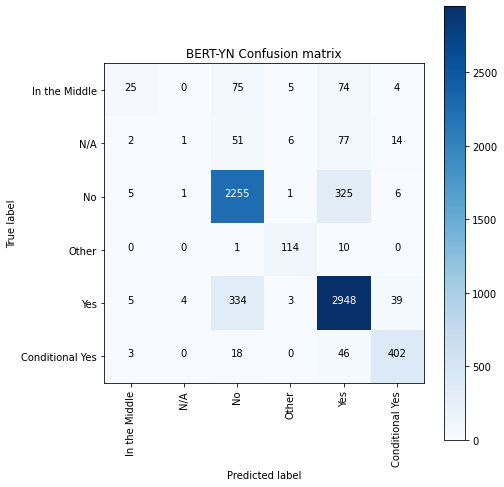

In [33]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(validation_gtruths['goldstandard2'], pred_results['goldstandard2'])

import numpy as np
import itertools
import matplotlib.pyplot as plt
# https://www.kaggle.com/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='BERT-YN Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cmat, 
            classes = ['In the Middle','N/A','No','Other','Yes','Conditional Yes'])

In [32]:
pred_results['id'] = df_test['id']
sub_results = pred_results
sub_results = sub_results.rename(columns={"goldstandard2": "BERT BOOLq YN"})

results_df = pd.read_excel('/content/drive/MyDrive/DL Project/Results/ModelResultsFINAL.xlsx')

results_df = results_df.drop(['Unnamed: 0'], axis = 1)
results_df['BERT BOOLq YN'] = sub_results['BERT BOOLq YN']

column_names = ["id", "question-X", "answer-Y","BERT YN Q only","BERT YN A only","BERT YN Q+A", "BERT DIS YN", "BERT BOOLq YN","goldstandard2"]


results_df = results_df.reindex(columns=column_names)

results_df.to_excel('/content/drive/MyDrive/DL Project/Results/ModelResultsFINAL.xlsx')